In [123]:
import pandas as pd
import numpy as np
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import langdetect 
import nltk

In [124]:
#Print unique authors and length of dataset
def print_info_df(data,label):
    print("The author dataset contains {} datapoints.".format(len(data)))
    print("There are {} unique authors.".format(len(data[label].unique())))

In [125]:
# Find all texts containing unusual characters
def find_character_list_count(text,character_list):
    matching_text = []
    for i in range(len(text)):
        for j in text[i]:
            if j in character_list:
                matching_text.append(i)
        
    matching_text = list(set(matching_text))
    print('There are', str(len(matching_text)), 'texts containing the characters provided.')
    return matching_text

In [126]:
#print unique character counts
def print_unique_character_counts(text):
    text_string = ''

    for i in range(len(text)):
        text_string += text[i].lower()

    # Get character frequencies
    char_cnt = Counter(text_string)
    print(char_cnt)
    print(len(char_cnt))
    return char_cnt

In [127]:
def most_frequent_ngrams(lst_tokens,author_name):

    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(30,30))
    fig.suptitle("Most frequent words", fontsize=15,)
    
    #unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
    dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    
    #bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
    dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
    dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
    ax[1].set(ylabel=None)



    #trigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 3))
    dtf_tri = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
    dtf_tri["Word"] = dtf_tri["Word"].apply(lambda x: " ".join(
                   string for string in x) )
    dtf_tri.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Trigrams", ax=ax[2],
                  legend=False).grid(axis='x')
    ax[2].set(ylabel=None)
    plt.savefig("outputs/most_common_ngrams_{}.eps".format(author_name), format='eps')
    plt.show()

In [128]:
#Parameters
FILE_NAME = "spooky_author_data.csv"
Y_LABEL =  "author"
X_LABEL = "text"

In [129]:
data = pd.read_csv(FILE_NAME)

In [130]:
#There are 3 unique authors with in the data 
print_info_df(data,Y_LABEL)

The author dataset contains 19579 datapoints.
There are 3 unique authors.


In [131]:
author_information= data[Y_LABEL].value_counts()

author_names = list(author_information.keys())
author_counts = list(author_information.values)

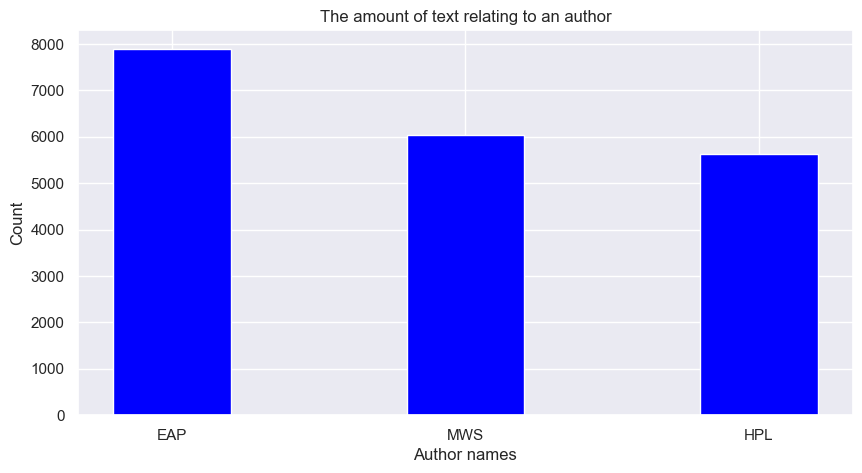

In [132]:
fig = plt.figure(figsize = (10, 5))
plt.bar(author_names, author_counts, color ='blue',
        width = 0.4)
 
plt.xlabel("Author names")
plt.ylabel("Count")
plt.title("The amount of text relating to an author")
plt.show()

C:\Users\leobl\AppData\Local\Temp\ipykernel_21216\4041798222.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[Y_LABEL]==i][x], hist=True, kde=False,
C:\Users\leobl\AppData\Local\Temp\ipykernel_21216\4041798222.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[

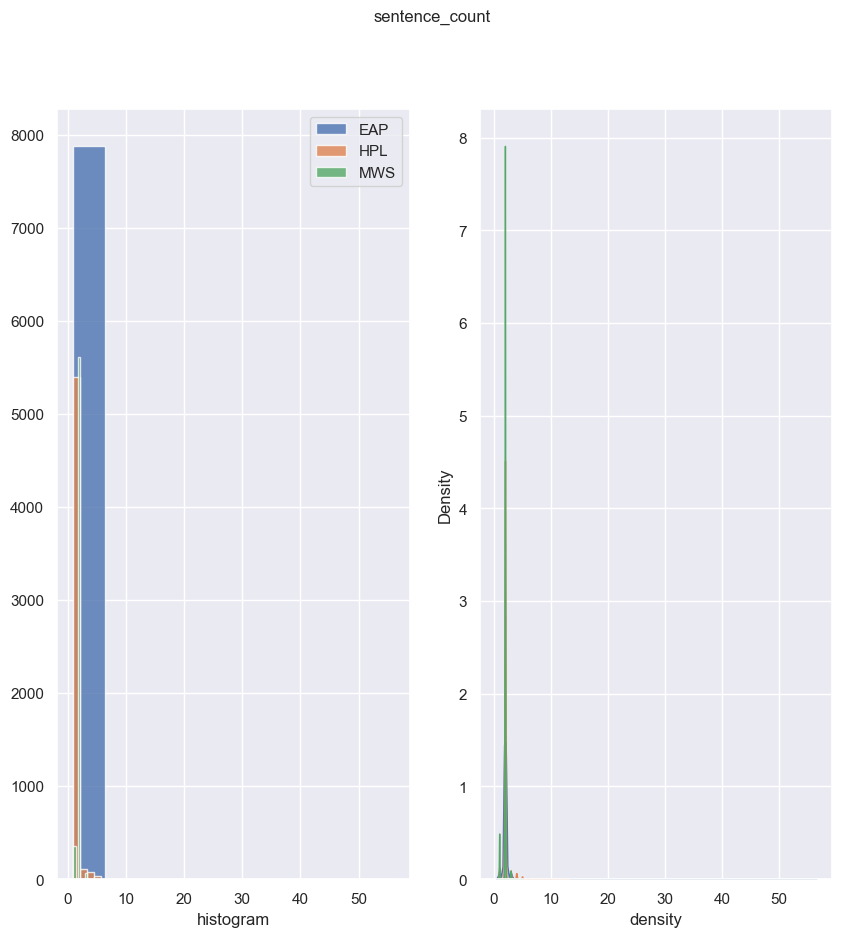

In [133]:
data['word_count'] = data[X_LABEL].apply(lambda x: len(str(x).split(" ")))
data['char_count'] = data[X_LABEL].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
data['sentence_count'] = data[X_LABEL].apply(lambda x: len(str(x).split(".")))
data['avg_word_length'] = data['char_count'] / data['word_count']
data['avg_sentence_length'] = data['word_count'] / data['sentence_count']
data.head()


x = "sentence_count"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
sns.set(rc={'figure.figsize':(15,15)})

for i in data[Y_LABEL].unique():
    sns.distplot(data[data[Y_LABEL]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(data[data[Y_LABEL]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(data[Y_LABEL].unique())
ax[1].grid(True)
plt.savefig("outputs/sentence_count_distribution.eps", format='eps')
plt.show()

C:\Users\leobl\AppData\Local\Temp\ipykernel_21216\1086162718.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[Y_LABEL]==i][x], hist=False, kde=True,
C:\Users\leobl\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2517: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\leobl\AppData\Local\Temp\ipykernel_21216\1086162718.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ada

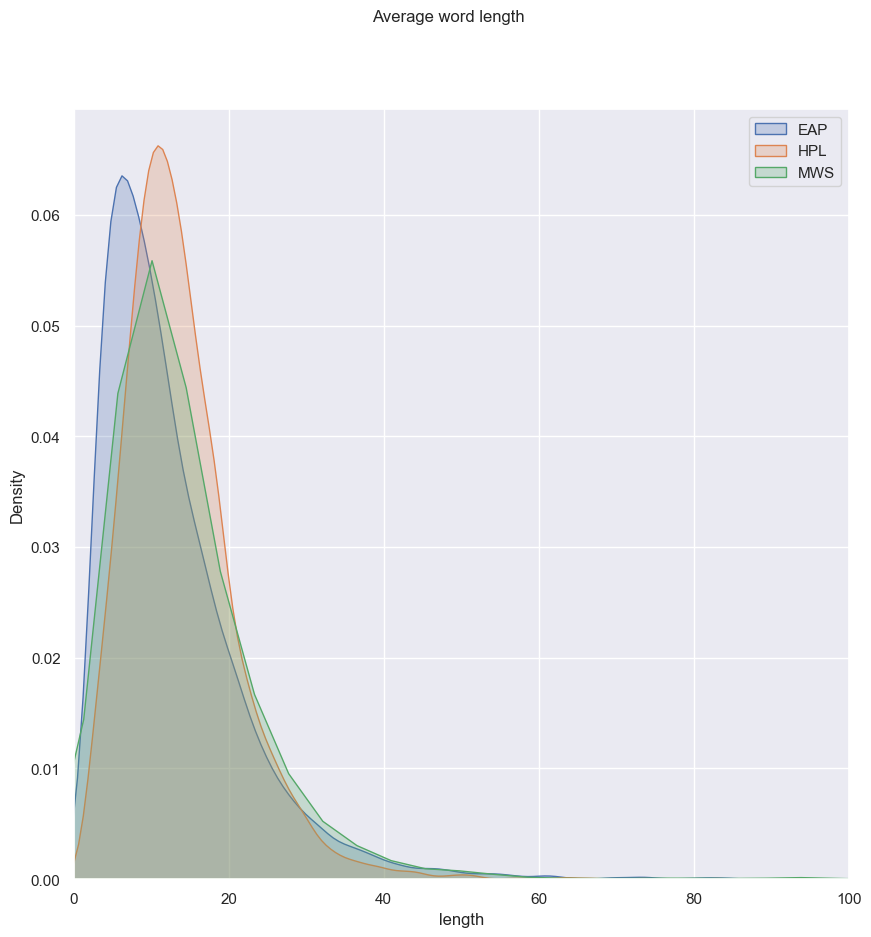

In [145]:
data['word_count'] = data[X_LABEL].apply(lambda x: len(str(x).split(" ")))
data['char_count'] = data[X_LABEL].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
data['avg_word_length'] = data['char_count'] / data['word_count']
data['avg_sentence_length'] = data['word_count'] / data['sentence_count']
data.head()


x = "avg_sentence_length"
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Average word length", fontsize=12)

sns.set(rc={'figure.figsize':(10,10)})
plt.xlim(0, 100)
for i in data[Y_LABEL].unique():
    sns.distplot(data[data[Y_LABEL]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="length",   
                 )
ax.grid(True)

ax.legend(data[Y_LABEL].unique())
ax.set_xlim(0,100)

plt.savefig("outputs/avg_sentence_length_distribution.eps", format='eps')
plt.show()

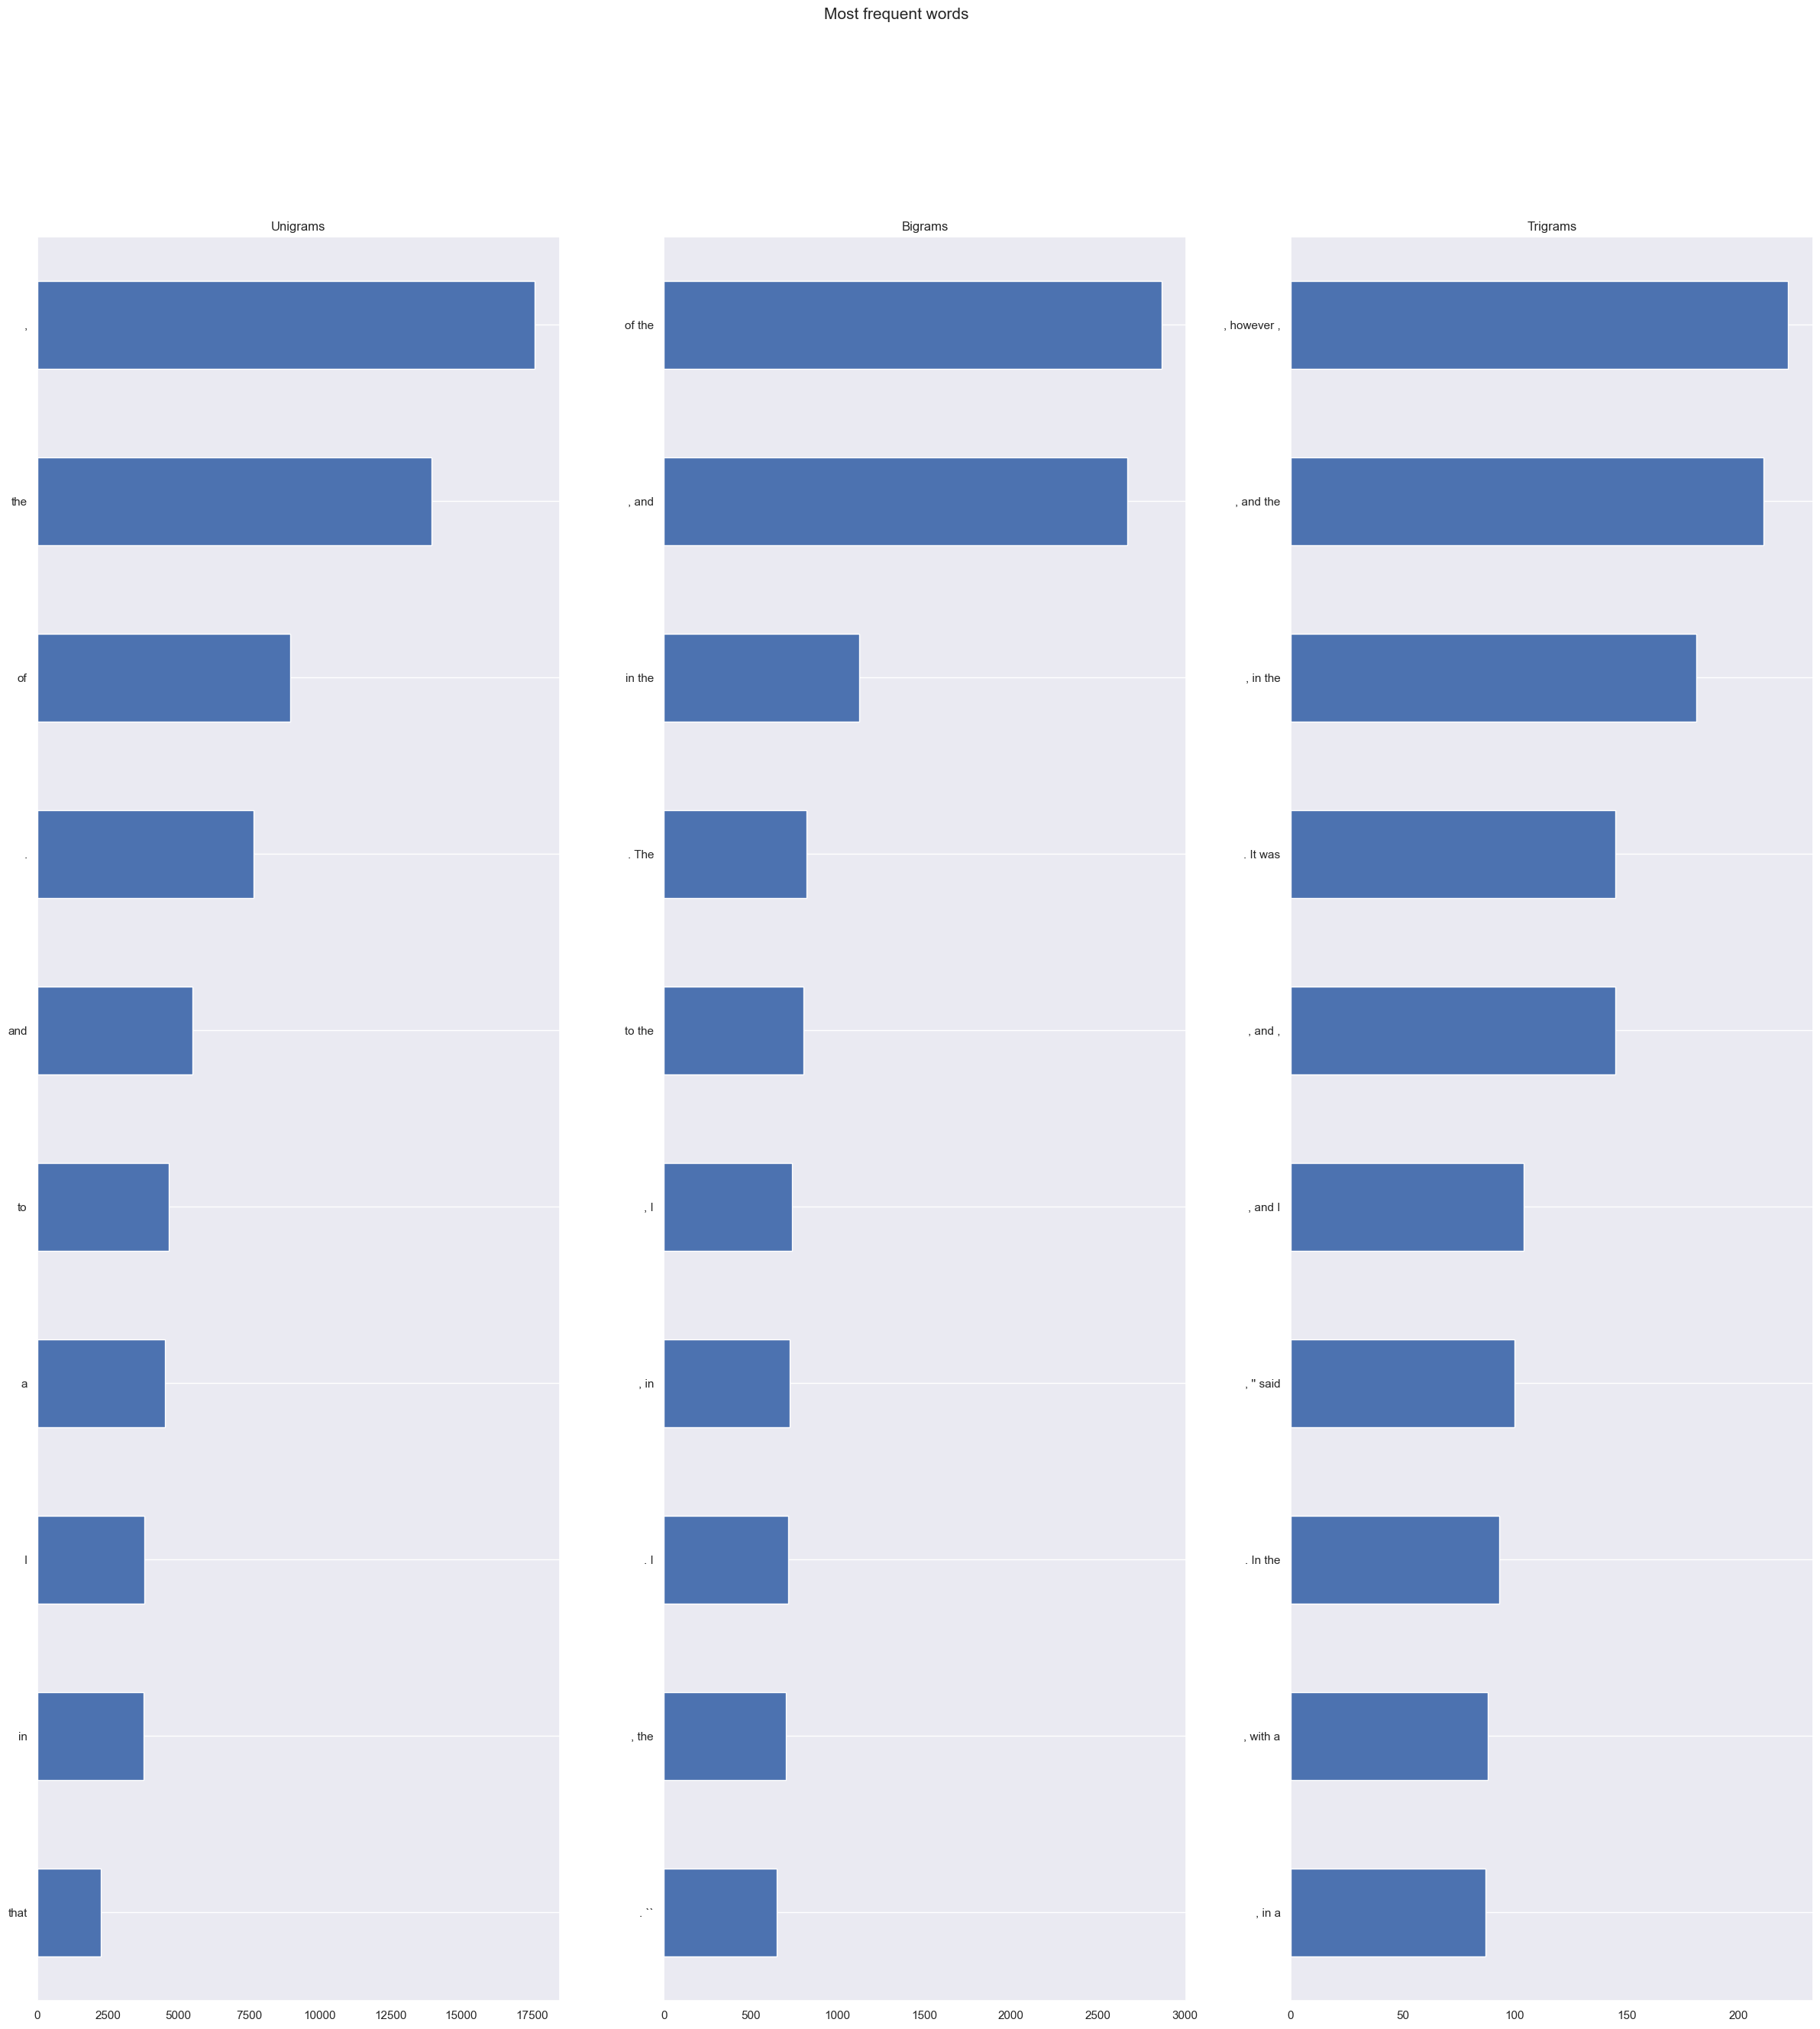

In [135]:
author_name = "EAP"
corpus = data[data[Y_LABEL]==author_name][X_LABEL]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
most_frequent_ngrams(lst_tokens=lst_tokens,author_name = author_name)

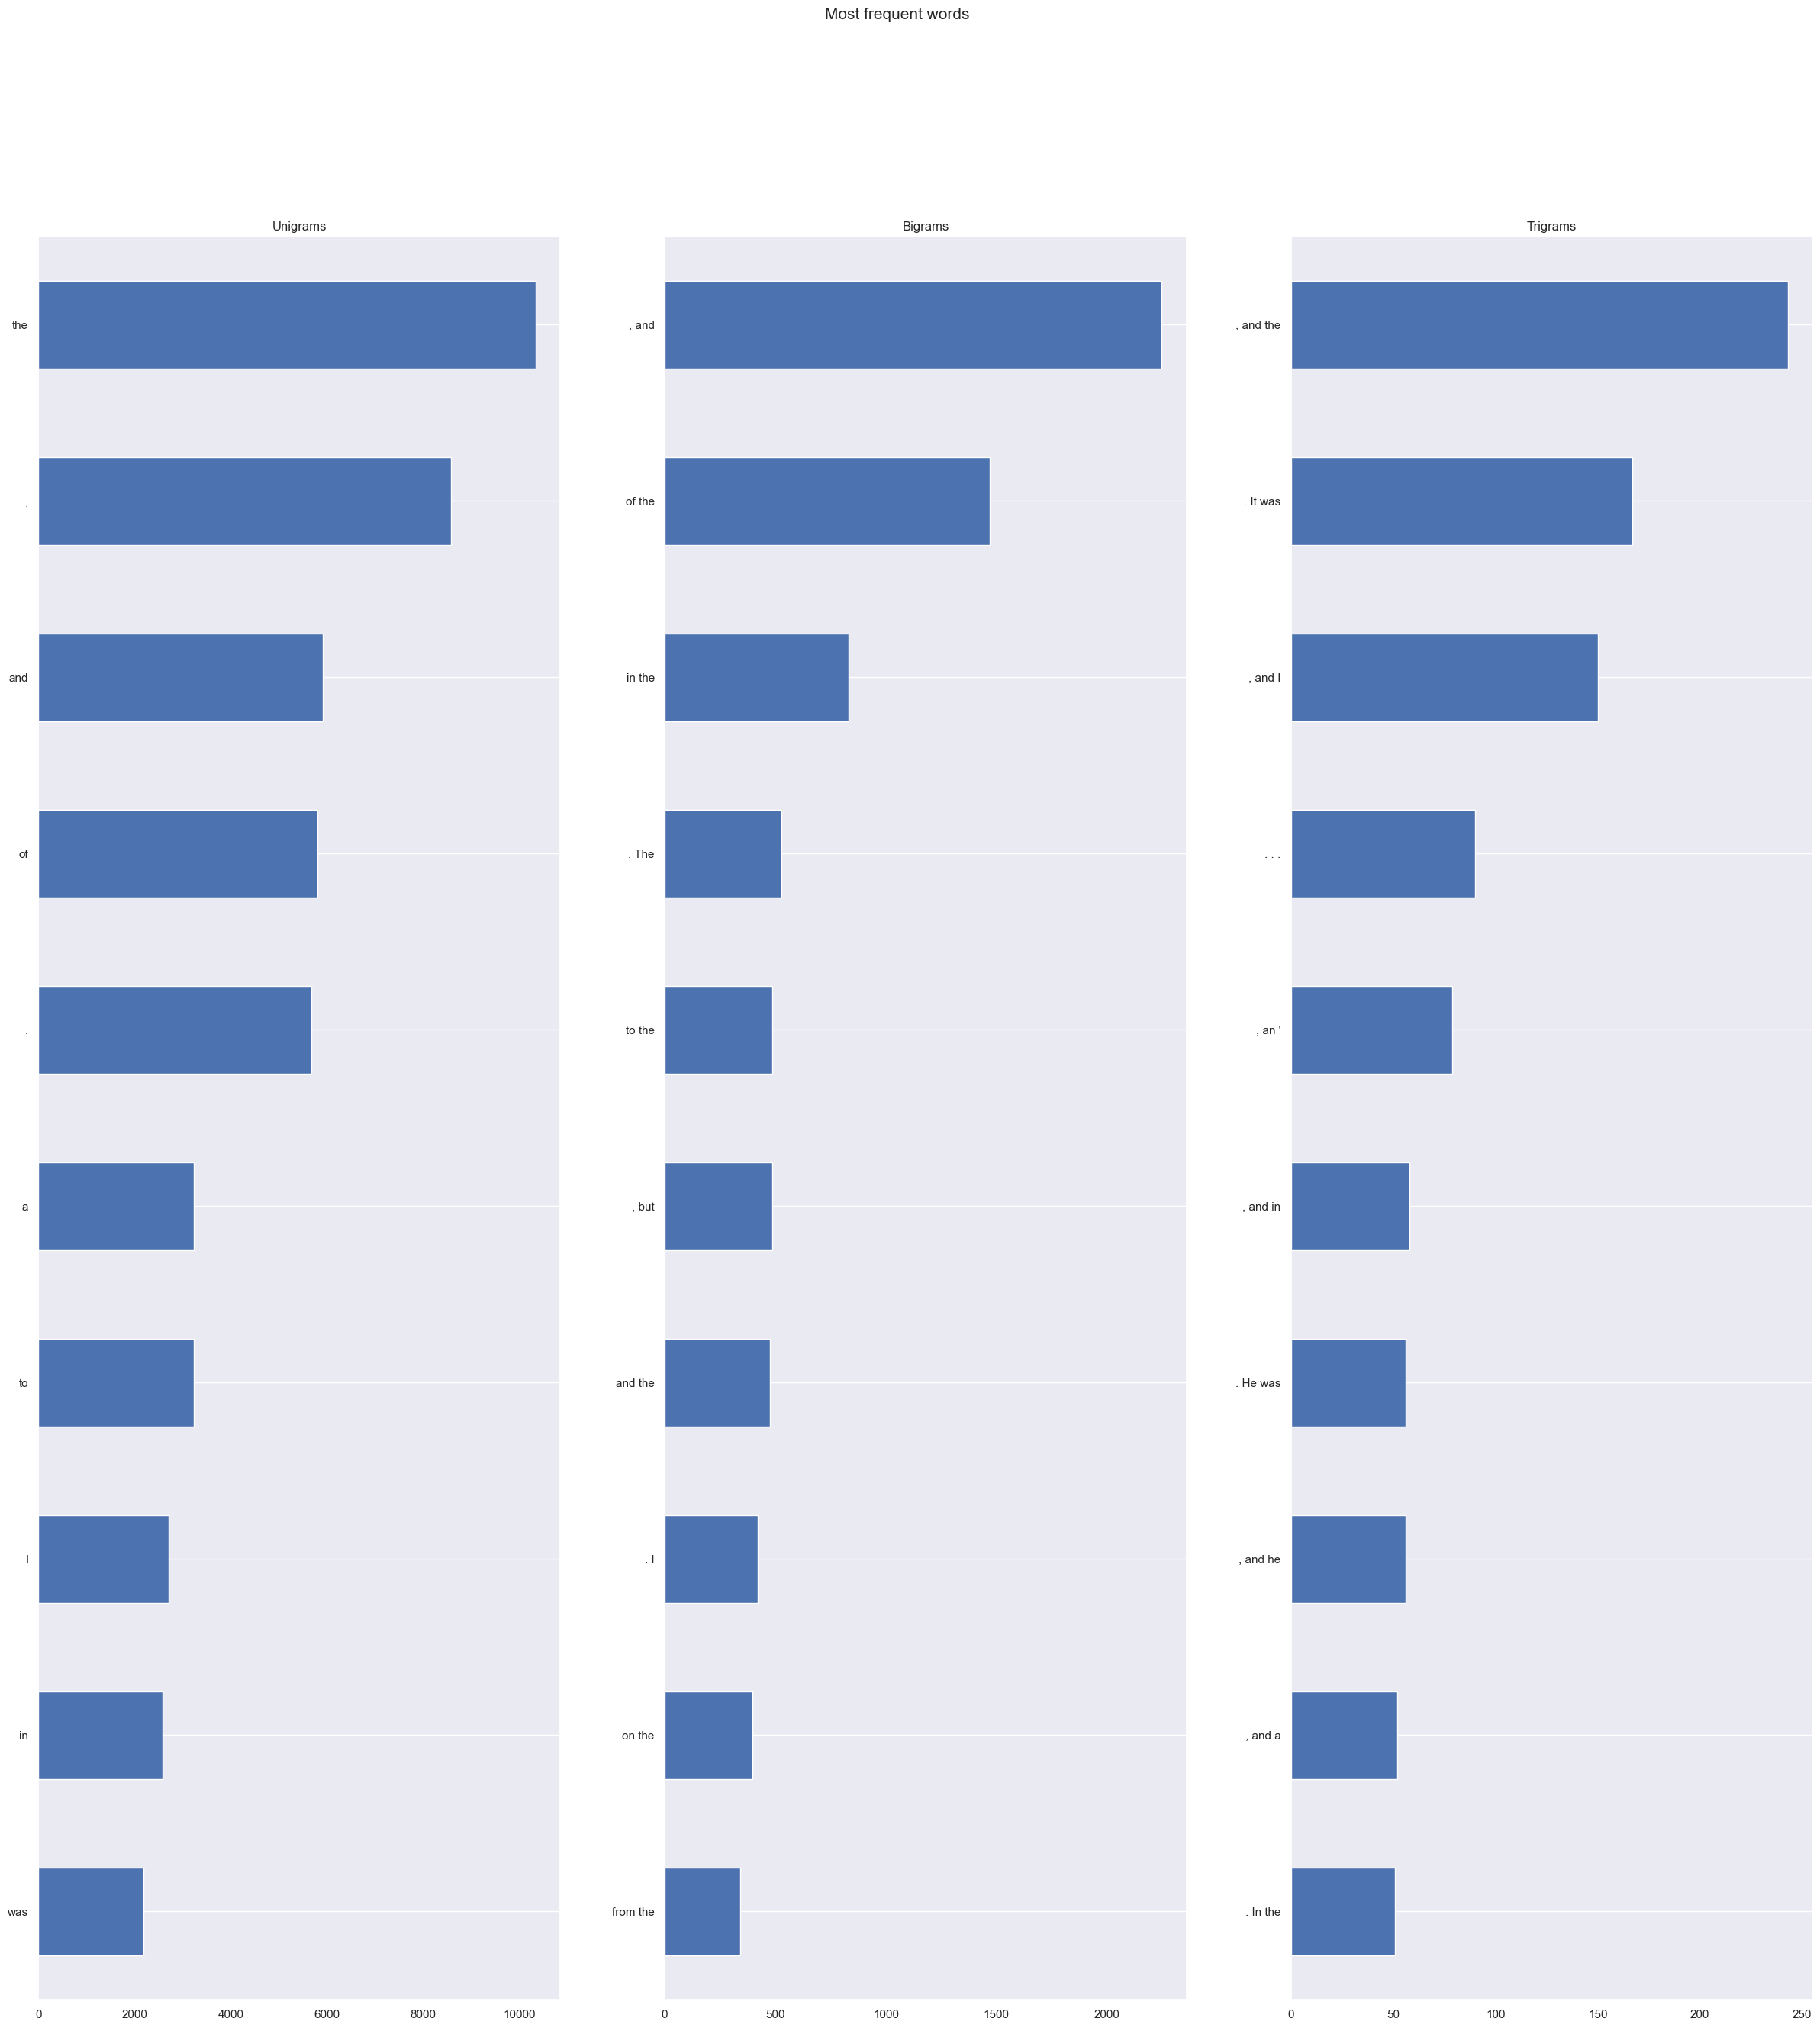

In [136]:
author_name = "HPL"
corpus = data[data[Y_LABEL]==author_name][X_LABEL]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
most_frequent_ngrams(lst_tokens=lst_tokens,author_name = author_name)

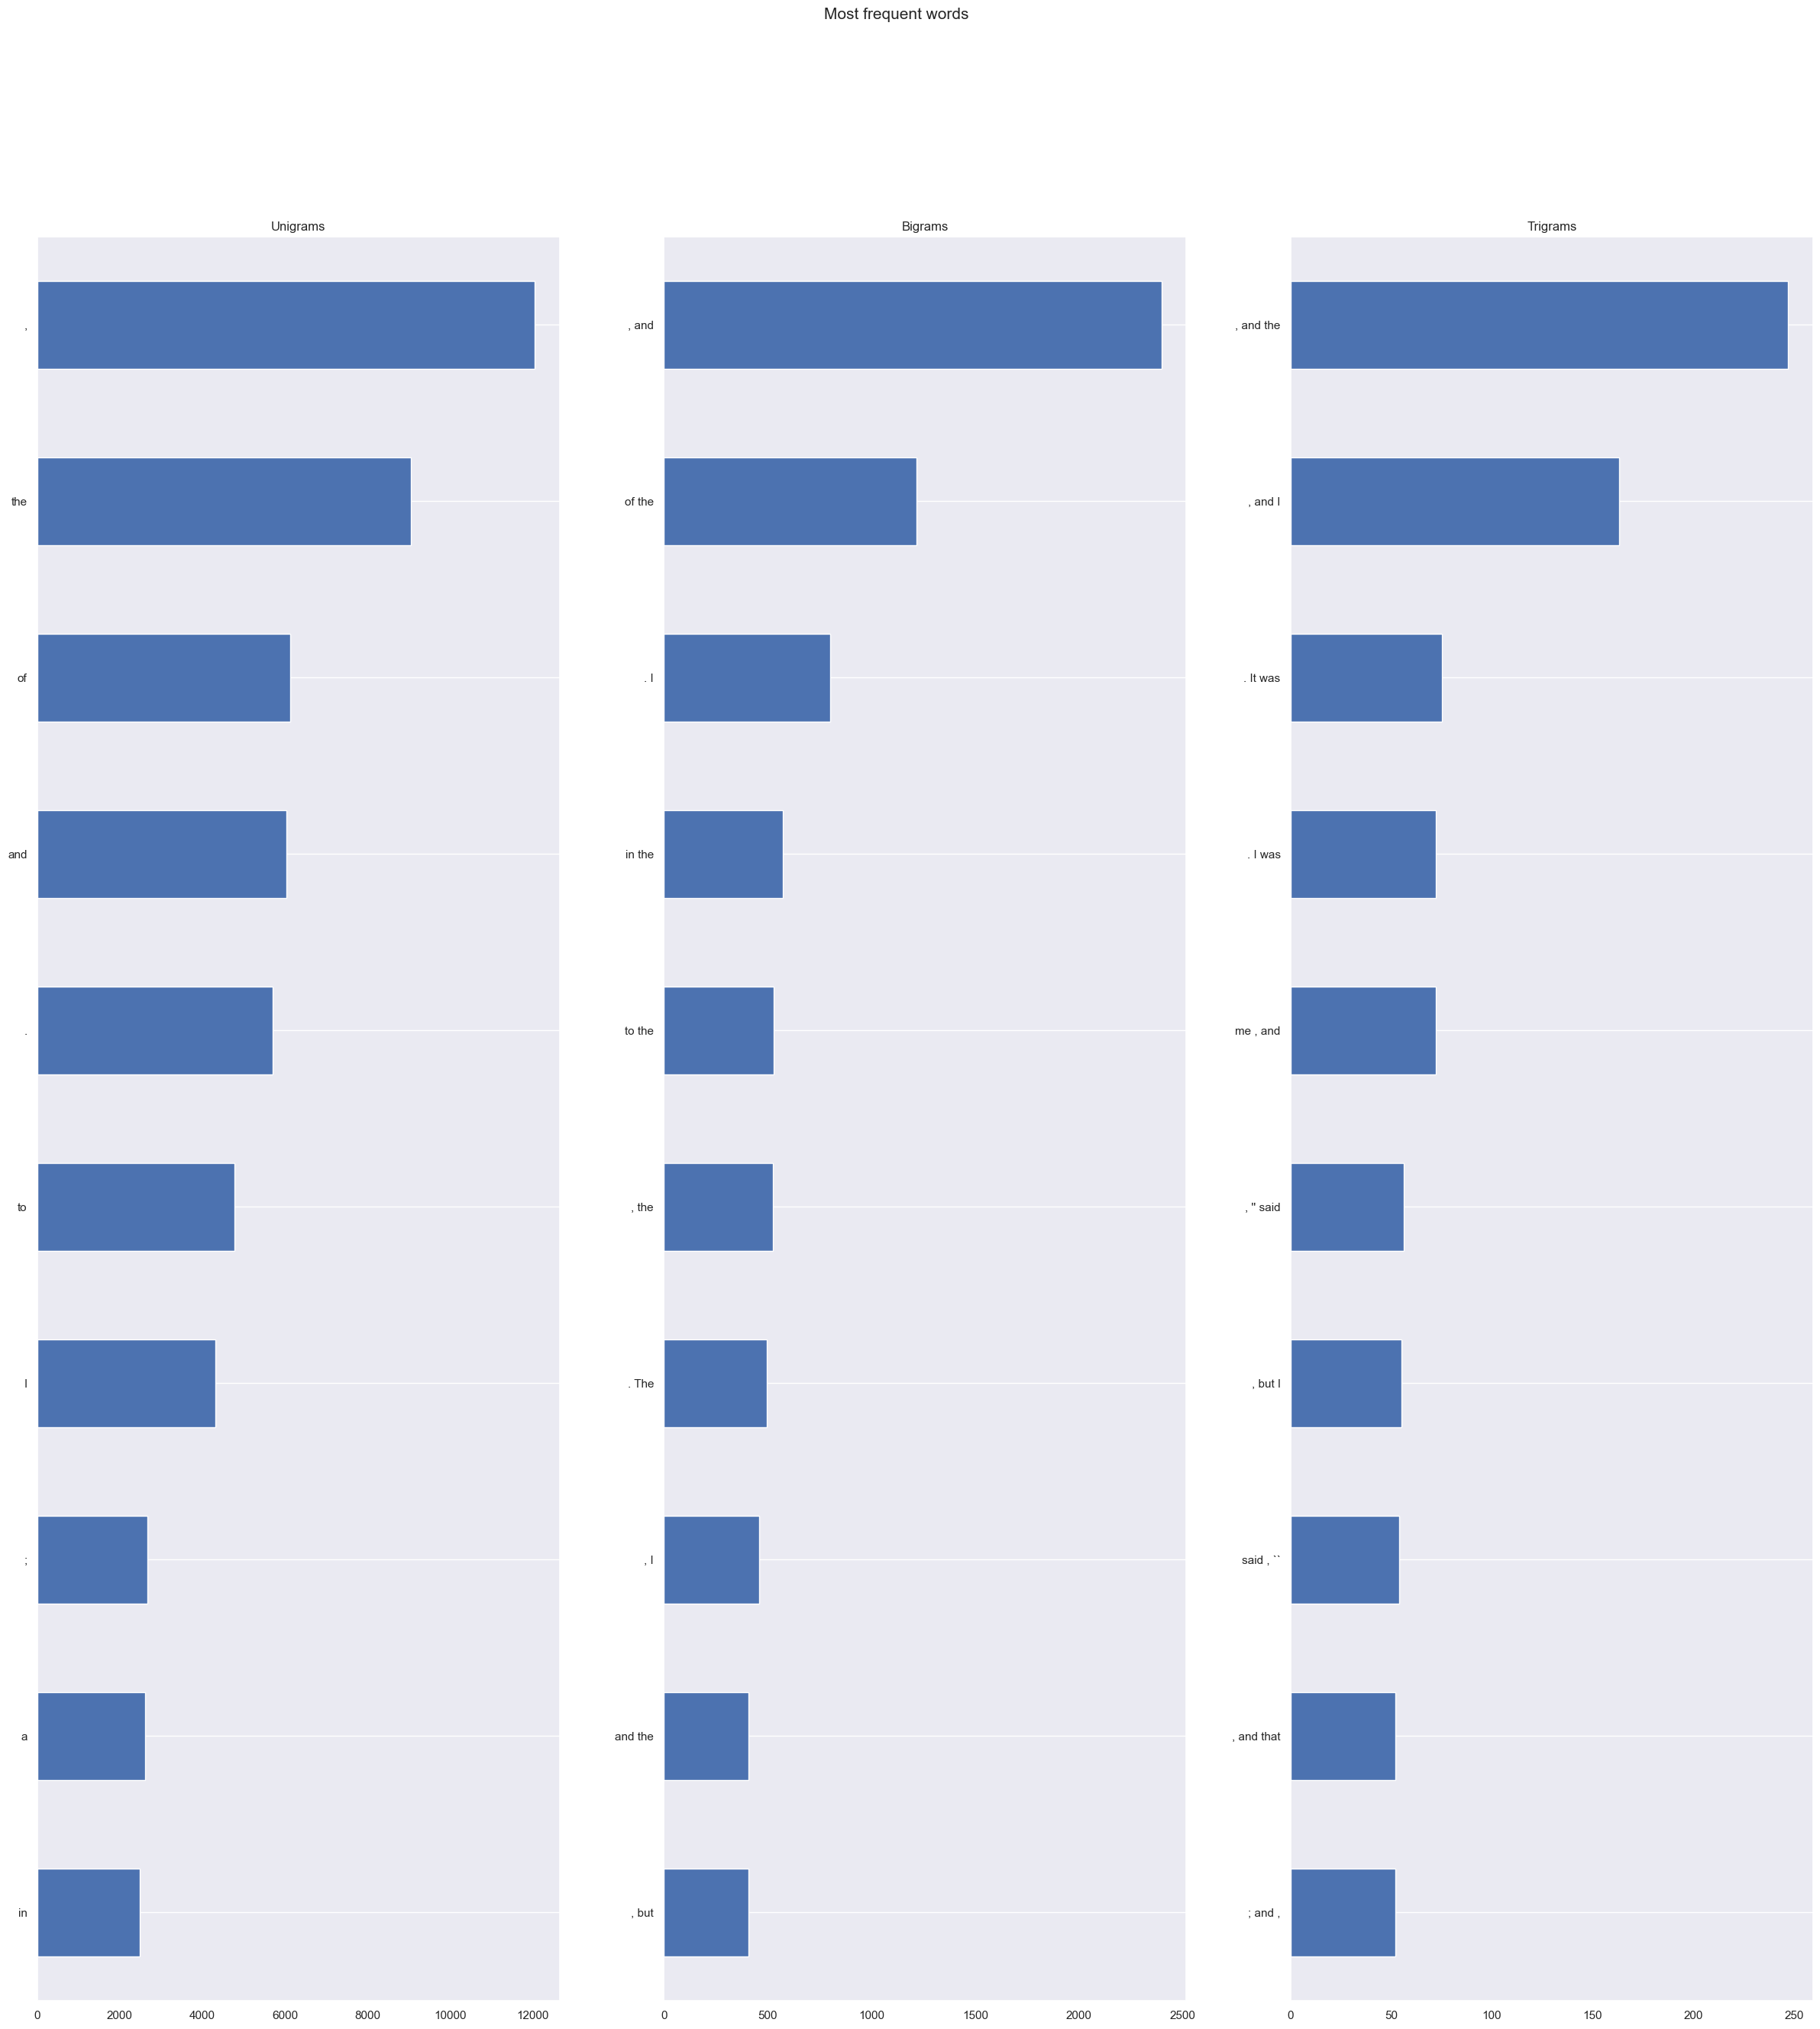

In [137]:
author_name = "MWS"
corpus = data[data[Y_LABEL]==author_name][X_LABEL]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
most_frequent_ngrams(lst_tokens=lst_tokens,author_name = author_name)

In [138]:
print_unique_character_counts(data[X_LABEL])

Counter({' ': 503777, 'e': 301820, 't': 212833, 'a': 183982, 'o': 172726, 'n': 164766, 'i': 164525, 's': 145866, 'h': 140362, 'r': 136733, 'd': 106595, 'l': 94477, 'u': 67161, 'm': 63010, 'c': 61518, 'f': 57861, 'w': 51275, 'y': 45039, 'g': 44517, 'p': 41875, ',': 38220, 'b': 35255, 'v': 24381, '.': 20075, 'k': 13485, ';': 5159, '"': 4969, 'x': 4305, "'": 3520, 'q': 2524, 'j': 2229, 'z': 1639, '?': 1098, ':': 562, 'é': 62, 'æ': 51, 'ê': 30, 'ö': 19, 'è': 15, 'ë': 12, 'à': 10, 'ô': 8, 'ñ': 7, 'ä': 7, 'ï': 7, 'â': 6, 'ü': 6, 'ο': 3, 'ἶ': 2, 'δ': 2, 'α': 2, 'î': 1, 'υ': 1, 'π': 1, 'ν': 1, 'ς': 1, 'å': 1, 'ç': 1})
58


Counter({'t': 212833,
         'h': 140362,
         'i': 164525,
         's': 145866,
         ' ': 503777,
         'p': 41875,
         'r': 136733,
         'o': 172726,
         'c': 61518,
         'e': 301820,
         ',': 38220,
         'w': 51275,
         'v': 24381,
         'a': 183982,
         'f': 57861,
         'd': 106595,
         'm': 63010,
         'n': 164766,
         'g': 44517,
         'y': 45039,
         'u': 67161,
         ';': 5159,
         'k': 13485,
         'b': 35255,
         'l': 94477,
         '.': 20075,
         'x': 4305,
         ':': 562,
         'q': 2524,
         "'": 3520,
         'j': 2229,
         '"': 4969,
         '?': 1098,
         'z': 1639,
         'æ': 51,
         'é': 62,
         'à': 10,
         'è': 15,
         'ö': 19,
         'ê': 30,
         'â': 6,
         'ñ': 7,
         'ä': 7,
         'ü': 6,
         'î': 1,
         'ë': 12,
         'ô': 8,
         'ï': 7,
         'υ': 1,
         'π': 1,
      

In [139]:
# Create list of accented characters
accented_chars = ['ï', 'é', 'ñ', 'è', 'ö', 'æ', 'ô', 'â', 'á', 'à', 'ê', 'ë','æ','ς']
accented_text = find_character_list_count(data[X_LABEL],accented_chars)

There are 184 texts containing the characters provided.


In [140]:
data[X_LABEL][accented_text[0]]

'"A madman," I said, "has done this deed some raving maniac, escaped from a neighboring Maison de Santé."'